In [59]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
from collections import defaultdict

In [49]:
years = [str(x) for x in range(2015, 2020)]
df = None
for y in years:
    if df is None:
        df = pd.read_csv(f'../../data/2021-12-16/csv/{y}.csv', index_col=0)
    else:
        _df = pd.read_csv(f'../../data/2021-12-16/csv/{y}.csv', index_col=0)
        df = pd.concat([df, _df])
df = df.reset_index().drop(columns=['index'])

data format
```json
[
    {
        'SerialNumber':
        'DocType':
        ...
        'Country': [...],
        'OrgName': [(FullOrgName, OrgFirstClassName)...],
        'Fullname': [...],
        'journaltitle'
    },
    ...
]
```

In [99]:
papers = []
for (serialId, x) in tqdm(df.groupby('SerialNumber')):
    try:
        paper = {}
        shared_cols = ['SerialNumber', 'DocType', 'DBYear', 'PaperSecUID', 'PaperTitle', 
                      'ArticleNumber', 'countryNumber', 'AuthorNumber', 'AffiliationNumber', 
                      'journaltitle']
        for col in shared_cols:
            assert len(x[col].unique()) == 1
            paper[col] = str(x[col].iloc[0])
        paper['Country'] = x['Country'].unique().tolist()
        paper['Fullname'] = x['Fullname'].unique().tolist()
        paper['OrgName'] = list(set((a, b) for a, b in zip(x['FullOrgName'], x['OrgFirstClassName'])))

        papers.append(paper)
    except:
        print(x['DBYear'].iloc[0], x['SerialNumber'].iloc[0], col)
        print('-'*10)
        continue

2019 48221336 PaperTitle
----------
2015 39487343 PaperTitle
----------
2015 39895133 PaperTitle
----------
2015 40008691 PaperTitle
----------
2015 40421213 PaperTitle
----------
2016 41014866 PaperTitle
----------
2016 41408939 PaperTitle
----------
2016 41865033 PaperTitle
----------
2017 43018340 PaperTitle
----------
2017 43958801 PaperTitle
----------
2018 46491900 PaperTitle
----------



In [100]:
with open('../../data/2021-12-16/json/all_papers.json', 'w') as f:
    json.dump(papers, f)

1. country-wise paper distribution over journal
2. org-wise paper distribution over journal
3. author-wise paper distribution over journal

In [101]:
country = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))
for paper in papers:
    for c in paper['Country']:
        country[c][paper['DBYear']][paper['journaltitle']] += 1

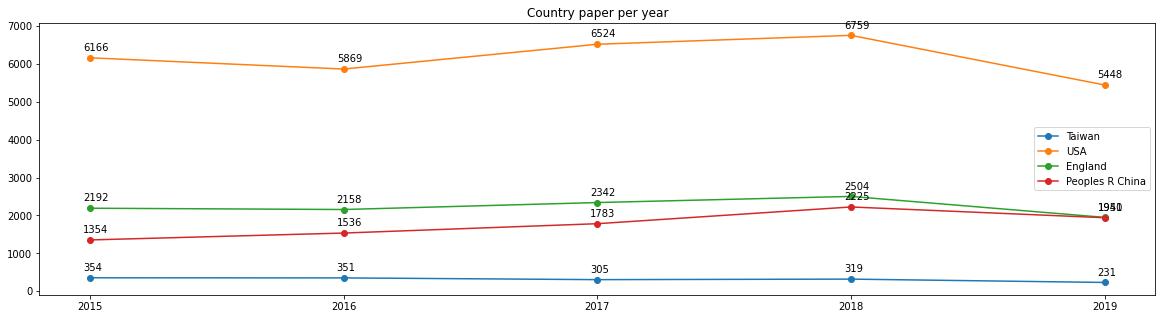

In [154]:
plt.figure(figsize=(20, 5))
country_in_interest = ['Taiwan', 'USA', 'England', 'Peoples R China']
for c in country_in_interest:
    data = []
    for i in range(2015, 2020):
        data.append(sum(country[c][str(i)].values()))
    plt.plot(data, '-o', label=c)
    for i in range(5):
        plt.annotate(str(data[i]), xy=(i, data[i]), xytext=(-7, 7), textcoords='offset points')
plt.xticks(range(5), list(map(str, range(2015, 2020))))
plt.title('Country paper per year')
plt.legend()

In [141]:
org = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))
for paper in papers:
    for c in paper['OrgName']:
        org[c[0]][paper['DBYear']][paper['journaltitle']] += 1

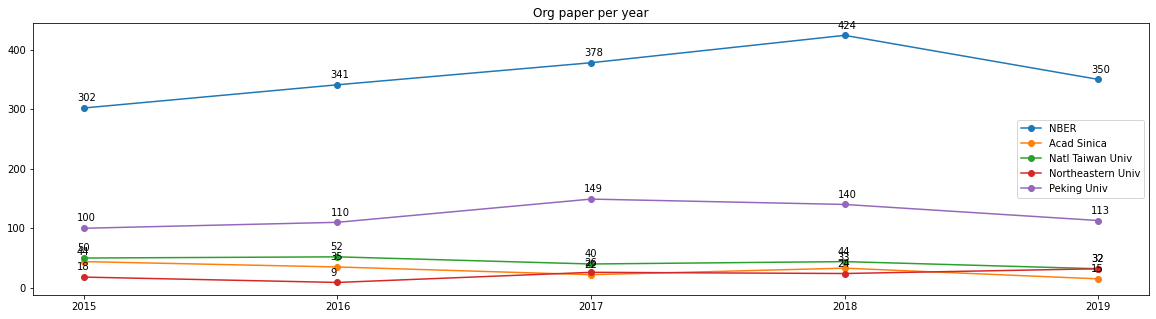

In [155]:
plt.figure(figsize=(20, 5))
org_in_interest = ['NBER', 'Acad Sinica', 'Natl Taiwan Univ', 'Northeastern Univ', 'Peking Univ']
for c in org_in_interest:
    data = []
    for i in range(2015, 2020):
        data.append(sum(org[c][str(i)].values()))
    plt.plot(data, '-o', label=c)
    for i in range(5):
        plt.annotate(str(data[i]), xy=(i, data[i]), xytext=(-7, 7), textcoords='offset points')
plt.xticks(range(5), list(map(str, range(2015, 2020))))
plt.title('Org paper per year')
plt.legend()

In [137]:
author = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))
for paper in papers:
    for c in paper['Fullname']:
        author[c][paper['DBYear']][paper['journaltitle']] += 1